In [1]:
from lib.fully_conn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.datasets import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
#!./get_datasets.sh
 !get_datasets.sh #for windows users

Load the dataset.

In [3]:
data = CIFAR10_data()
for k, v in data.items():
    print ("Name: {} Shape: {}".format(k, v.shape))

Name: data_train Shape: (49000, 3, 32, 32)
Name: labels_train Shape: (49000,)
Name: data_val Shape: (1000, 3, 32, 32)
Name: labels_val Shape: (1000,)
Name: data_test Shape: (1000, 3, 32, 32)
Name: labels_test Shape: (1000,)


In [4]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

In [5]:
print(data["data_train"].shape)
print(data["labels_train"].shape)

(49000, 3, 32, 32)
(49000,)


In [6]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 1e-4)

results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################

batch_size = 10
epochs = 25
lr_decay = 0.8
lr_decay_every = 5

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
results = train_net(data_dict, model, loss_f, optimizer, batch_size, epochs
                    ,lr_decay, lr_decay_every, show_every=10000, verbose=True)
opt_params, loss_hist, train_acc_hist, val_acc_hist = results

(Iteration 1 / 73500) loss: 2.3029011365905383
(Epoch 1 / 15) Training Accuracy: 0.4563265306122449, Validation Accuracy: 0.471
(Epoch 2 / 15) Training Accuracy: 0.4903469387755102, Validation Accuracy: 0.47
(Iteration 10001 / 73500) loss: 1.4039855745139027
(Epoch 3 / 15) Training Accuracy: 0.5288775510204081, Validation Accuracy: 0.492
(Epoch 4 / 15) Training Accuracy: 0.5338571428571428, Validation Accuracy: 0.497
(Iteration 20001 / 73500) loss: 1.2190467470106268
(Epoch 5 / 15) Training Accuracy: 0.5632448979591836, Validation Accuracy: 0.511
Decaying learning rate of the optimizer to 8e-05
(Epoch 6 / 15) Training Accuracy: 0.5860204081632653, Validation Accuracy: 0.519
(Iteration 30001 / 73500) loss: 1.0283497487675803
(Epoch 7 / 15) Training Accuracy: 0.5965102040816327, Validation Accuracy: 0.513
(Epoch 8 / 15) Training Accuracy: 0.6018571428571429, Validation Accuracy: 0.499
(Iteration 40001 / 73500) loss: 0.9592740089250011
(Epoch 9 / 15) Training Accuracy: 0.5848775510204082,

In [7]:
# Take a look at what names of params were stored
print (opt_params.keys())

dict_keys(['fc1_train_w', 'fc1_train_b', 'fc2_train_w', 'fc2_train_b'])


In [8]:
#load the parameters to a newly defined network
model = TinyNet()
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print ("Validation Accuracy: {}%".format(val_acc*100))
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print ("Testing Accuracy: {}%".format(test_acc*100))

Loading Params: fc1_train_w Shape: (3072, 100)
Loading Params: fc1_train_b Shape: (100,)
Loading Params: fc2_train_w Shape: (100, 10)
Loading Params: fc2_train_b Shape: (10,)
Validation Accuracy: 51.800000000000004%
Testing Accuracy: 50.6%


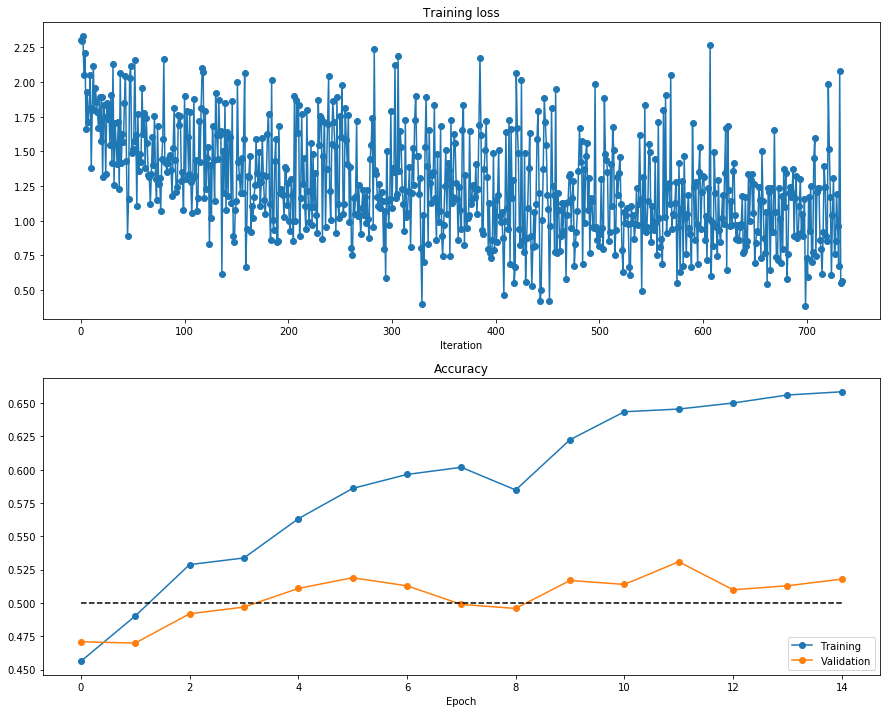

In [9]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [10]:
# Train two identical nets, one with dropout and one without
num_train = 100
data_dict_100 = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

solvers = {}
keep_ps = [0, 0.25, 0.50, 0.75]

results_dict = {}
for keep_prob in keep_ps:
    results_dict[keep_prob] = {}

for keep_prob in keep_ps:
    seed = 123
    np.random.seed(seed=seed)

    print ("Dropout Keep Prob =", keep_prob)
    model = DropoutNetTest(keep_prob=keep_prob)
    loss_f = cross_entropy()
    optimizer = SGD(model.net, 1e-4)
    results = train_net(data_dict_100, model, loss_f, optimizer, batch_size=20, 
                        max_epochs=50, show_every=1000, verbose=True)
    opt_params, loss_hist, train_acc_hist, val_acc_hist = results
    results_dict[keep_prob] = {
        "opt_params": opt_params, 
        "loss_hist": loss_hist, 
        "train_acc_hist": train_acc_hist, 
        "val_acc_hist": val_acc_hist
    }

Dropout Keep Prob = 0
(Iteration 1 / 250) loss: 2.8714007645507165
(Epoch 1 / 50) Training Accuracy: 0.1, Validation Accuracy: 0.089
(Epoch 2 / 50) Training Accuracy: 0.16, Validation Accuracy: 0.105
(Epoch 3 / 50) Training Accuracy: 0.17, Validation Accuracy: 0.117
(Epoch 4 / 50) Training Accuracy: 0.21, Validation Accuracy: 0.126
(Epoch 5 / 50) Training Accuracy: 0.24, Validation Accuracy: 0.127
(Epoch 6 / 50) Training Accuracy: 0.28, Validation Accuracy: 0.135
(Epoch 7 / 50) Training Accuracy: 0.34, Validation Accuracy: 0.134
(Epoch 8 / 50) Training Accuracy: 0.36, Validation Accuracy: 0.138
(Epoch 9 / 50) Training Accuracy: 0.4, Validation Accuracy: 0.143
(Epoch 10 / 50) Training Accuracy: 0.42, Validation Accuracy: 0.146
(Epoch 11 / 50) Training Accuracy: 0.49, Validation Accuracy: 0.147
(Epoch 12 / 50) Training Accuracy: 0.52, Validation Accuracy: 0.153
(Epoch 13 / 50) Training Accuracy: 0.52, Validation Accuracy: 0.152
(Epoch 14 / 50) Training Accuracy: 0.6, Validation Accuracy:

(Epoch 20 / 50) Training Accuracy: 0.58, Validation Accuracy: 0.174
(Epoch 21 / 50) Training Accuracy: 0.57, Validation Accuracy: 0.177
(Epoch 22 / 50) Training Accuracy: 0.61, Validation Accuracy: 0.178
(Epoch 23 / 50) Training Accuracy: 0.64, Validation Accuracy: 0.177
(Epoch 24 / 50) Training Accuracy: 0.64, Validation Accuracy: 0.179
(Epoch 25 / 50) Training Accuracy: 0.65, Validation Accuracy: 0.181
(Epoch 26 / 50) Training Accuracy: 0.68, Validation Accuracy: 0.182
(Epoch 27 / 50) Training Accuracy: 0.71, Validation Accuracy: 0.192
(Epoch 28 / 50) Training Accuracy: 0.72, Validation Accuracy: 0.189
(Epoch 29 / 50) Training Accuracy: 0.73, Validation Accuracy: 0.192
(Epoch 30 / 50) Training Accuracy: 0.74, Validation Accuracy: 0.189
(Epoch 31 / 50) Training Accuracy: 0.75, Validation Accuracy: 0.188
(Epoch 32 / 50) Training Accuracy: 0.76, Validation Accuracy: 0.191
(Epoch 33 / 50) Training Accuracy: 0.77, Validation Accuracy: 0.194
(Epoch 34 / 50) Training Accuracy: 0.79, Validat

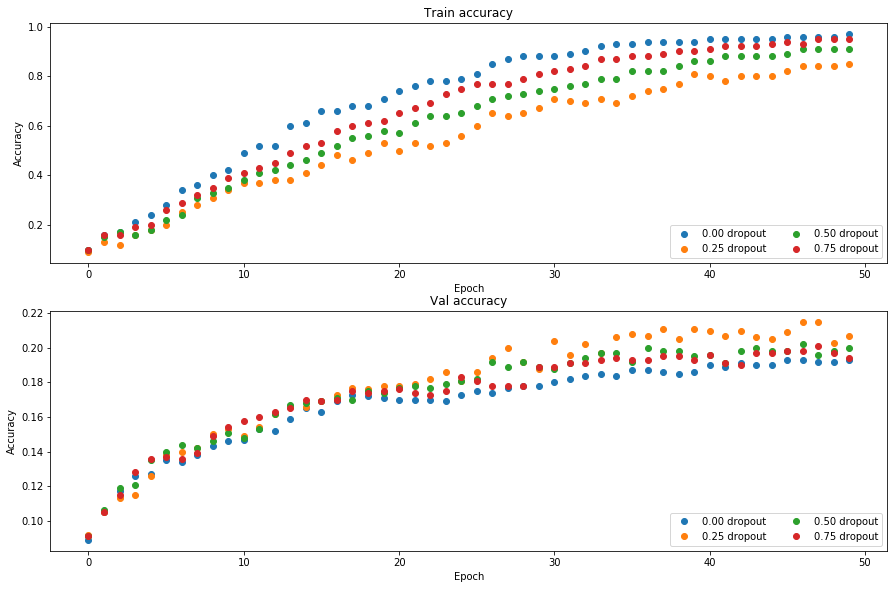

In [11]:
train_accs = []
val_accs = []
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    train_accs.append(curr_dict["train_acc_hist"][-1])
    val_accs.append(curr_dict["val_acc_hist"][-1])

plt.subplot(3, 1, 1)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["train_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["val_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()